In [1]:
import os
os.chdir("C:\\Users\\Adhvaidh\\Downloads")

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
ds=pd.read_csv("USD_INR Historical Data.csv")

In [4]:
ds.tail()

,Date,Price,Open,High,Low,Change %
2082,"Mar 25, 2020",76.375,76.375,76.375,76.375,0.00%
2083,"Mar 26, 2020",74.890,75.885,75.965,74.890,-1.95%
2084,"Mar 27, 2020",75.472,74.625,75.533,74.365,0.78%
2085,"Mar 30, 2020",75.410,75.145,75.675,75.096,-0.08%
2086,"Mar 31, 2020",75.343,75.535,75.680,75.280,-0.09%


In [5]:
ds=ds.drop(['Open','High','Low','Change %'],axis=1)

In [6]:
ds.head()

,Date,Price
0,"Apr 02, 2012",50.800
1,"Apr 03, 2012",50.560
2,"Apr 04, 2012",51.050
3,"Apr 05, 2012",51.040
4,"Apr 06, 2012",51.115


In [7]:
ds['Date']=pd.to_datetime(ds['Date'])

In [8]:
ds.head()

,Date,Price
0,2012-04-02,50.800
1,2012-04-03,50.560
2,2012-04-04,51.050
3,2012-04-05,51.040
4,2012-04-06,51.115


In [9]:
ds.set_index('Date', inplace=True)

In [10]:
ds.head()

,Price
Date,
2012-04-02,50.800
2012-04-03,50.560
2012-04-04,51.050
2012-04-05,51.040
2012-04-06,51.115


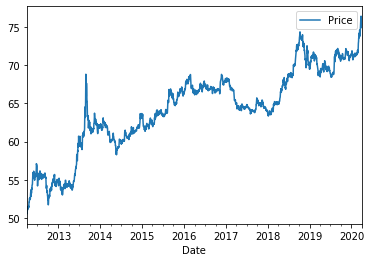

In [11]:
ds.plot()

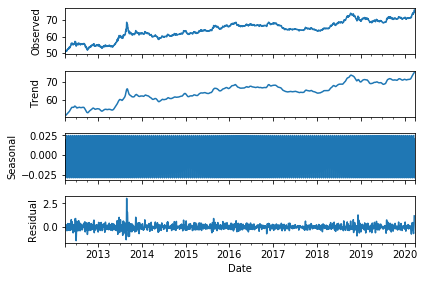

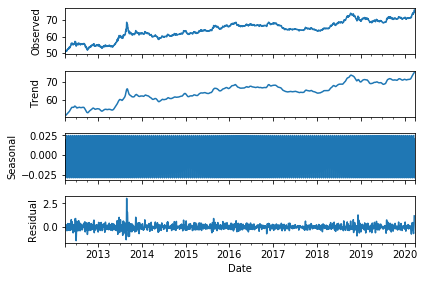

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(ds['Price'], freq=12)  
decomp.plot()

In [13]:
from statsmodels.tsa.stattools import adfuller
adfuller(ds['Price'])

(-1.5671706546679032,
 0.5000605936375696,
 5,
 2081,
 {'1%': -3.433496268455886,
  '5%': -2.8629298817129585,
  '10%': -2.5675099086169206},
 644.7591963644445)

In [14]:
def adf_chec(time_series):
    result=adfuller(time_series)
    print("Augmented Dickey fuller test")
    labels=['ADF Test Statistic', 'P-value', '#Lags', 'No of obs.']
    for value, label in zip(result, labels):
        print(label + ':' + str(value))
    if result[1]<=0.05:
        print('Strong evidence against null hypothesis, timeseries is stationery')
    else: 
        print('Weak evidence against null hypothesis, timeseries is non-stationery')

In [15]:
adf_chec(ds['Price'])

Augmented Dickey fuller test
ADF Test Statistic:-1.5671706546679032
P-value:0.5000605936375696
#Lags:5
No of obs.:2081
Weak evidence against null hypothesis, timeseries is non-stationery


In [16]:
ds['Price First Diff']=ds['Price']-ds['Price'].shift(1)  

In [17]:
ds.head()

,Price,Price First Diff
Date,,
2012-04-02,50.800,NaN
2012-04-03,50.560,-0.240
2012-04-04,51.050,0.490
2012-04-05,51.040,-0.010
2012-04-06,51.115,0.075


In [18]:
adf_chec(ds['Price First Diff'].dropna())

Augmented Dickey fuller test
ADF Test Statistic:-19.353025951653994
P-value:0.0
#Lags:4
No of obs.:2081
Strong evidence against null hypothesis, timeseries is stationery


In [19]:
#p=0;d=1;q=0

In [20]:
ds['Seasonal Difference']=ds['Price']-ds['Price'].shift(12)  

In [21]:
ds.head()

,Price,Price First Diff,Seasonal Difference
Date,,,
2012-04-02,50.800,NaN,NaN
2012-04-03,50.560,-0.240,NaN
2012-04-04,51.050,0.490,NaN
2012-04-05,51.040,-0.010,NaN
2012-04-06,51.115,0.075,NaN


In [22]:
adf_chec(ds['Seasonal Difference'].dropna())

Augmented Dickey fuller test
ADF Test Statistic:-7.933772390121839
P-value:3.4570258238018183e-12
#Lags:25
No of obs.:2049
Strong evidence against null hypothesis, timeseries is stationery


In [23]:
#d=1, D=0

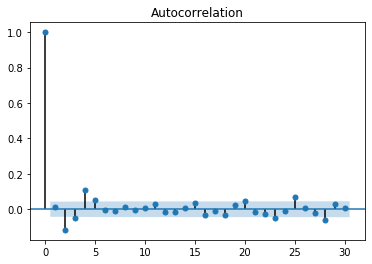

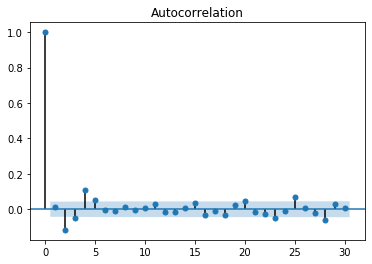

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ds['Price First Diff'].dropna(), lags=30)

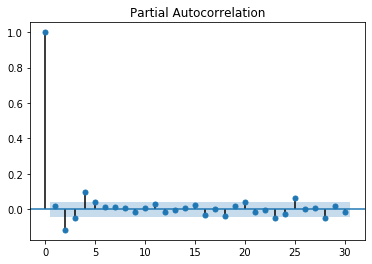

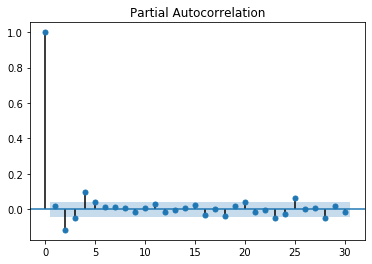

In [25]:
#q=1
plot_pacf(ds['Price First Diff'].dropna(), lags=30)
#p=1

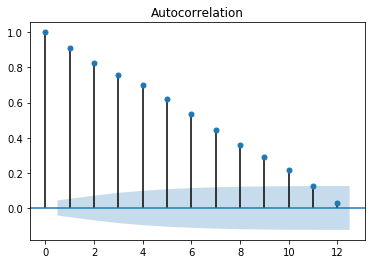

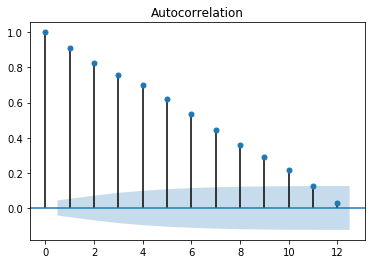

In [26]:
plot_acf(ds['Seasonal Difference'].dropna(), lags=12) #Q=6

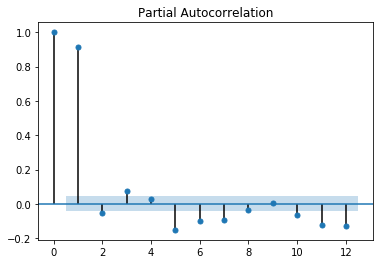

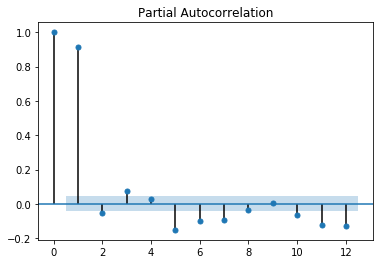

In [27]:
plot_pacf(ds['Seasonal Difference'].dropna(), lags=12) #P=1

In [28]:
#Finally,       AR  I  MA
#      TREND :  1   1  1

#SEASONALITY :  1  0   6


In [35]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model=ARIMA(ds['Price'],order=(1,0,6))
results=model.fit()


C:\Users\Adhvaidh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


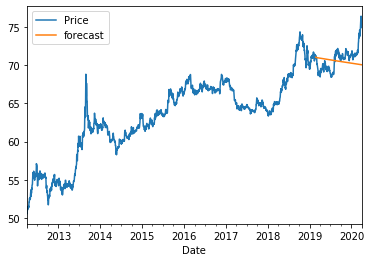

In [36]:
ds['forecast']=results.predict(start=1800, end=2087, dynamic=True)
ds[['Price','forecast']].plot()

In [37]:
from pandas.tseries.offsets import DateOffset
future_dates=[ds.index[-1]+ DateOffset(days=x) for x in range(0,365)]

In [38]:
future_dates_df_1=pd.DataFrame(index=future_dates[1:], columns=ds.columns)
future_df_1=pd.concat([ds,future_dates_df_1])

In [39]:
future_dates_df_1

,Price,Price First Diff,Seasonal Difference,forecast
2020-04-01,NaN,NaN,NaN,NaN
2020-04-02,NaN,NaN,NaN,NaN
2020-04-03,NaN,NaN,NaN,NaN
2020-04-04,NaN,NaN,NaN,NaN
2020-04-05,NaN,NaN,NaN,NaN
2020-04-06,NaN,NaN,NaN,NaN
2020-04-07,NaN,NaN,NaN,NaN
2020-04-08,NaN,NaN,NaN,NaN
2020-04-09,NaN,NaN,NaN,NaN
2020-04-10,NaN,NaN,NaN,NaN


In [40]:
future_df_1['forecast']=results.predict(start=2088, end=2453, dynamic=True)
future_df_1[['Price','forecast']].plot()

ValueError: could not broadcast input array from shape (5) into shape (6)

In [ ]:
future_df_1.tail(-2088)

In [ ]:
future_df_2=future_df_1.drop(['Price','Price First Diff','Seasonal Difference'],axis=1)